<a href="https://colab.research.google.com/github/look4pritam/ArtificialIntelligence/blob/master/MachineLearning/Notebooks/DecisionTree/HyperparameterSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameters for Decision Tree Classifier

In this example, we will learn to select hyperparameters for a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree_learning).

We will use Pima Indian Diabetes dataset for classification.

See [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) for more details.

# Set the root directory for processing.

In [1]:
import os

root_dir = '/content/'
os.chdir(root_dir)

!ls -al   

total 20
drwxr-xr-x 1 root root 4096 Dec 22 05:34 .
drwxr-xr-x 1 root root 4096 Dec 22 05:32 ..
drwxr-xr-x 4 root root 4096 Dec 20 20:18 .config
-rw-r--r-- 1 root root   67 Dec 22 05:34 kaggle.json
drwxr-xr-x 1 root root 4096 Dec 20 20:19 sample_data


# Set kaggle API token.

Create Kaggle API token. Upload the token 'kaggle.json' at '/content/' directory.

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = root_dir

In [3]:
!chmod 600 /content/kaggle.json

# Download kaggle dataset for further processing.

In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 8.34MB/s]


In [5]:
!unzip pima-indians-diabetes-database.zip
!ls -al

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            
total 56
drwxr-xr-x 1 root root  4096 Dec 22 05:35 .
drwxr-xr-x 1 root root  4096 Dec 22 05:32 ..
drwxr-xr-x 4 root root  4096 Dec 20 20:18 .config
-rw-r--r-- 1 root root 23873 Sep 19  2019 diabetes.csv
-rw------- 1 root root    67 Dec 22 05:34 kaggle.json
-rw-r--r-- 1 root root  9128 Dec 22 05:35 pima-indians-diabetes-database.zip
drwxr-xr-x 1 root root  4096 Dec 20 20:19 sample_data


In [6]:
!mv diabetes.csv pima-indians-diabetes.csv
!ls -al 

total 56
drwxr-xr-x 1 root root  4096 Dec 22 05:35 .
drwxr-xr-x 1 root root  4096 Dec 22 05:32 ..
drwxr-xr-x 4 root root  4096 Dec 20 20:18 .config
-rw------- 1 root root    67 Dec 22 05:34 kaggle.json
-rw-r--r-- 1 root root 23873 Sep 19  2019 pima-indians-diabetes.csv
-rw-r--r-- 1 root root  9128 Dec 22 05:35 pima-indians-diabetes-database.zip
drwxr-xr-x 1 root root  4096 Dec 20 20:19 sample_data


# Import required python modules.

In [7]:
import numpy as np
np.random.seed(7)

In [8]:
import pandas as pd

# Process PIMA dataset.

### Define feature names.

In [9]:
feature_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

### Load an iris dataset from sklearn datasets.

In [10]:
pima_dataset = pd.read_csv('pima-indians-diabetes.csv', header=None, names=feature_names)

In [11]:
pima_dataset.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


### Define input variables (X) and an output variable (y).

In [12]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima_dataset[feature_cols]
X = X[1:]
y = pima_dataset.label
y = y[1:]

# Split PIMA dataset.

### Import required python modules.

In [13]:
from sklearn.model_selection import train_test_split

### Split the dataset.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree based classfier.

### Import required python modules.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Predict the results for test dataset.

In [17]:
y_pred = model.predict(X_test)

# Evaluate the model predictions.

### Import required python modules.

In [18]:
from sklearn import metrics

In [19]:
print('Accuracy -',metrics.accuracy_score(y_test, y_pred))

Accuracy - 0.6666666666666666


# Interpret the generated decision tree. 

### Import required python modules.

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO

In [21]:
dot_data = StringIO()
export_graphviz(model, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1']
                )

### Export the generated decision tree as a dot data.

In [22]:
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pima_tree.png')

True

### Visualize the generated decision tree.

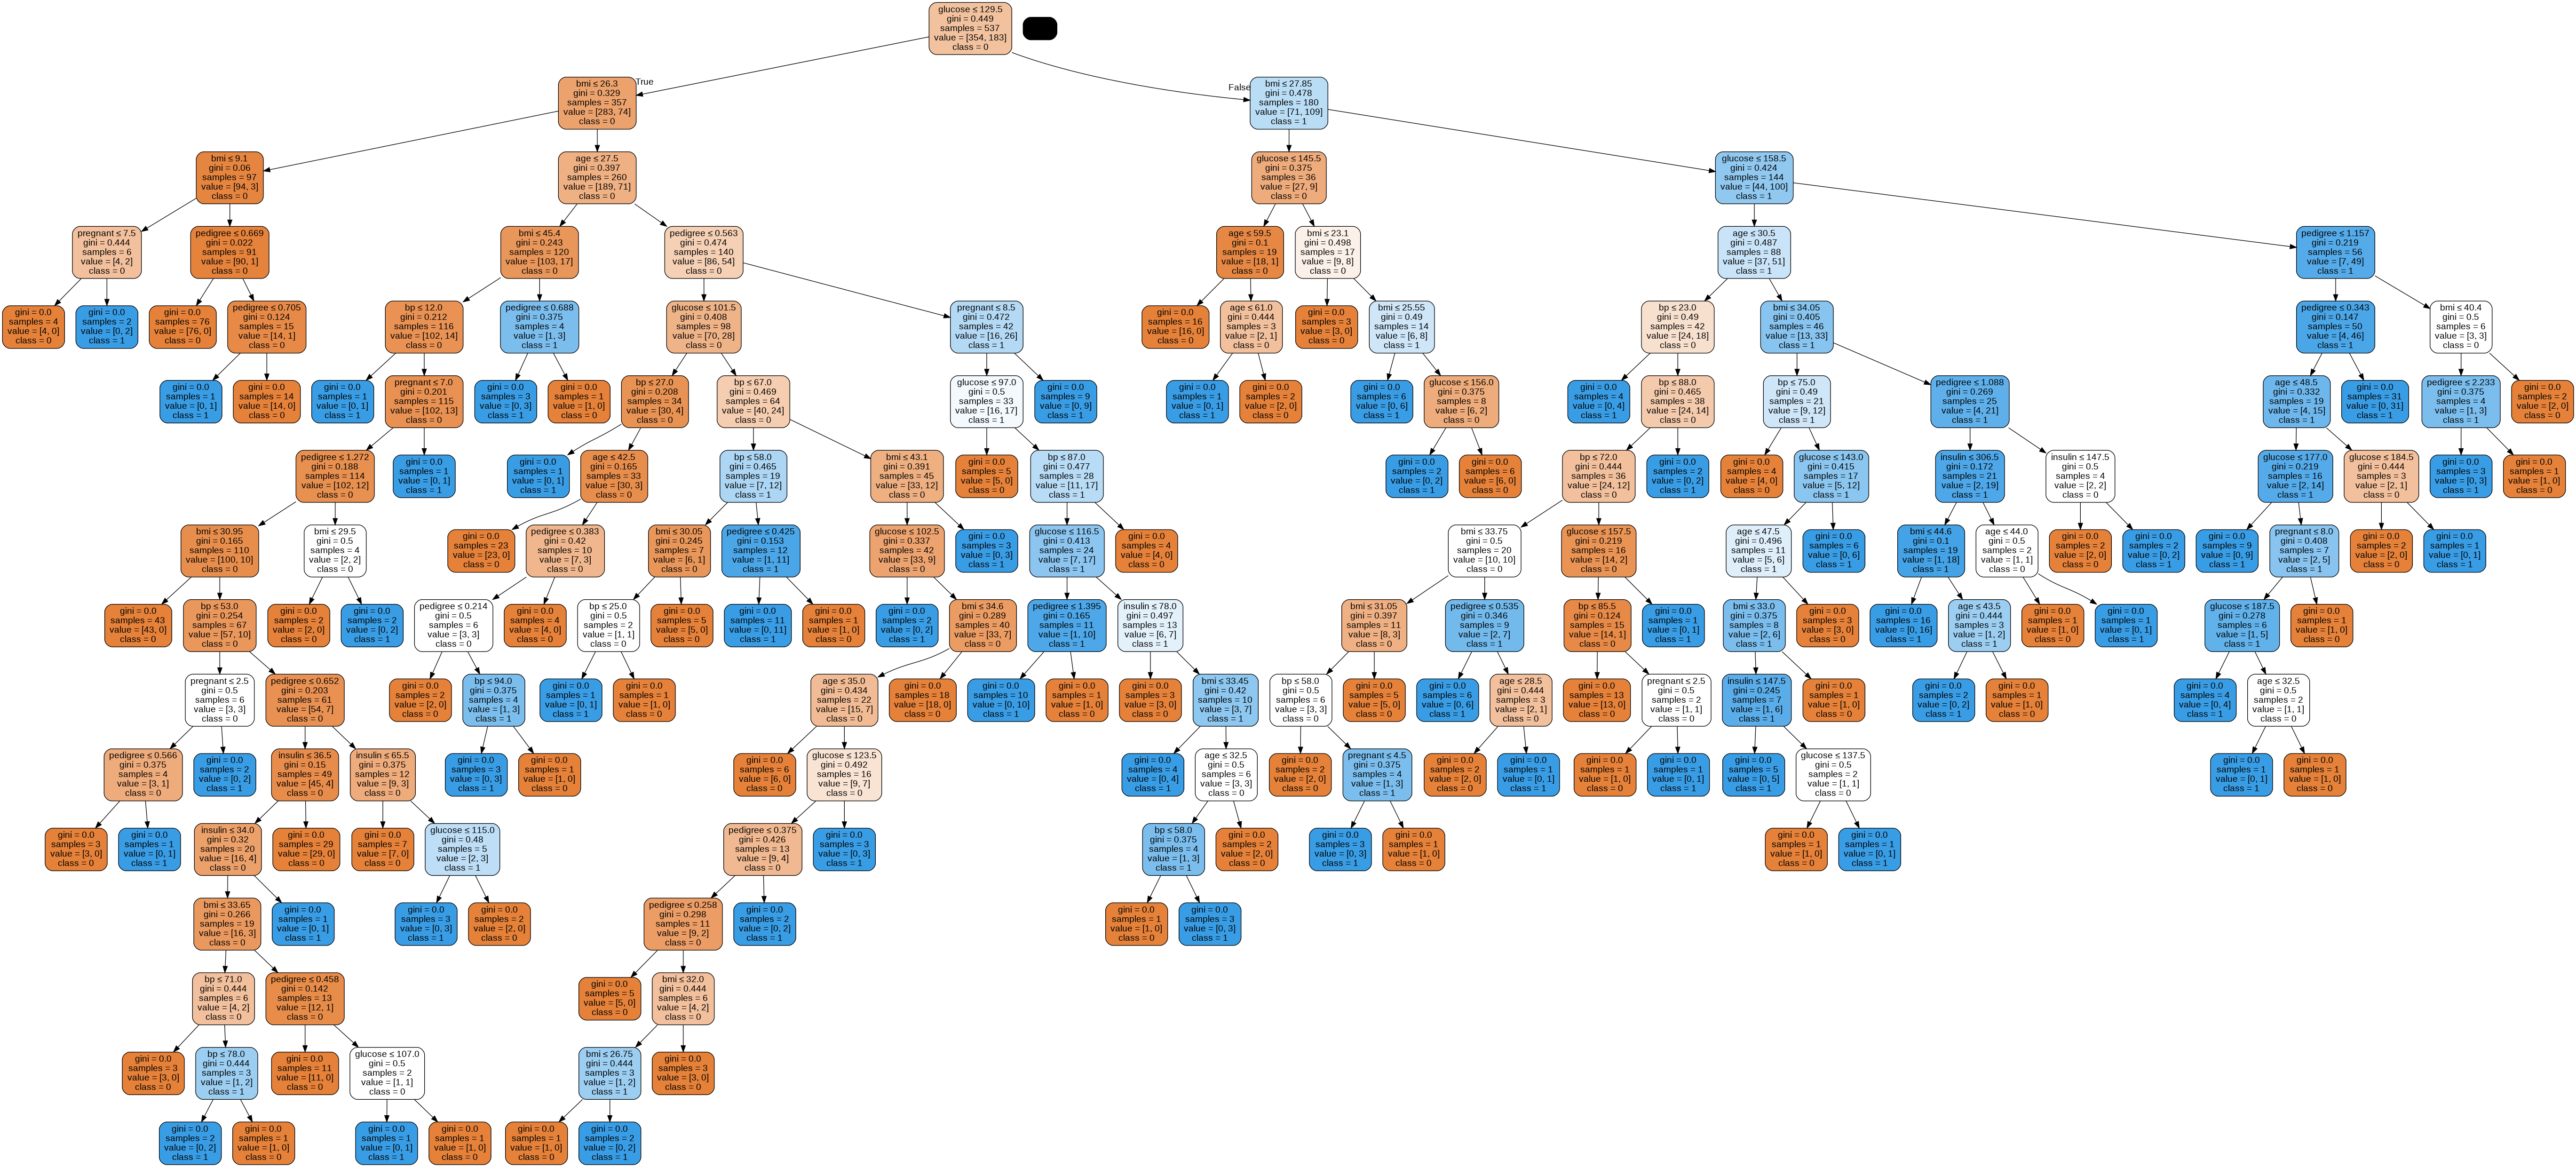

In [23]:
from IPython.display import Image  

Image(graph.create_png())

# Hyperparameter Selection for Decision Tree

### Create a decision tree based classfier.

In [24]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

### Train a dsecision tree classifer.

In [25]:
model = model.fit(X_train,y_train)

### Predict the results for test dataset.

In [26]:
y_pred = model.predict(X_test)

### Evaluate the model predictions.

In [27]:
print('Accuracy -',metrics.accuracy_score(y_test, y_pred))

Accuracy - 0.7705627705627706


# Visualize the generated decision tree.

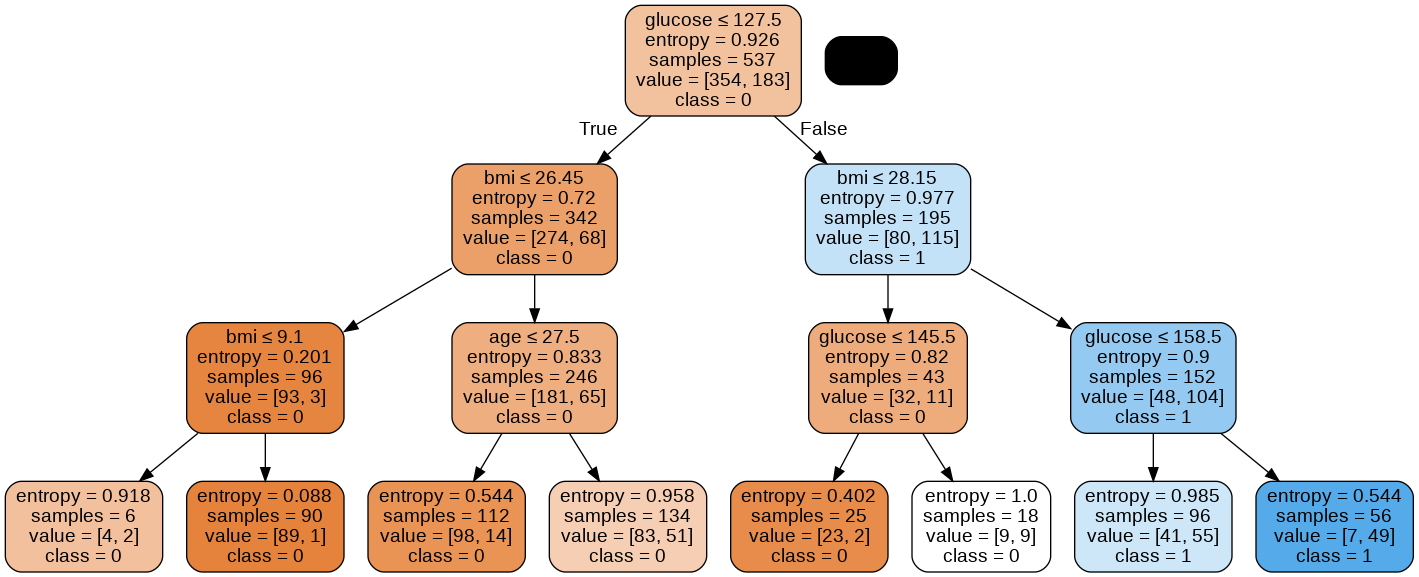

In [28]:
dot_data = StringIO()
export_graphviz(model, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pima_optimized_tree.png')
Image(graph.create_png())